# DOWNSAMPLING - SUBMUESTREO

Usaremos las librerias pandas y sklearn para ilustrar el proceso de Downsampling o Submuestreo de datos en 1D (series de tiempo) y datos en 2D (imágenes). Esta técnica es útil en aplicaciones que necesitan reducir el tamaño de los datos por: 

- Límites en la capacidad de procesamiento
- Porque se consideran datos innecesarios par el procesamiento posterior o 
- Para balancear grupos de datos.

## 1. SERIES DE TIEMPO

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Leemos los datos

Corresponden a datos de ventas de un producto durante 3 años

In [7]:
Datos = pd.read_csv('2.data/Ventas.csv')
Datos.head()

,Mes,Ventas
0,1,266.0
1,2,145.9
2,3,183.1
3,4,119.3
4,5,180.3


## Graficamos los datos originales

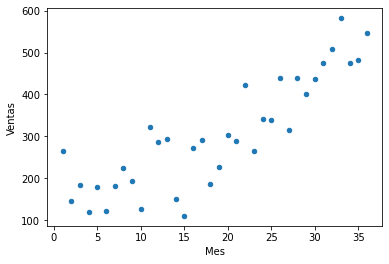

In [8]:
Datos.plot.scatter(x='Mes',y='Ventas')
plt.show()

## Aplicamos Downsampling con un Factor F

F define el submuestreo, entre más grande el valor de F menor el número de datos que obtenemos despues del submuestreo:

- F = 2, obtendremos una señal con la mitad de datos de la original
- F = 3, obtendremos una señal con la tercera parte de datos de la original

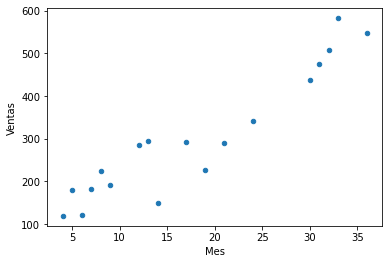

In [7]:
from sklearn.utils import resample

Factor=2

N_muestras=int(Datos.shape[0]/Factor)
D_sub = resample(Datos, replace=False, n_samples=N_muestras, random_state=123)
D_sub.plot.scatter(x='Mes',y='Ventas')
plt.show()

# TALLER
Cargar los datos del archivo Motor.csv y submuestrearlos con un factor de F = 3. Graficar y comparar los datos originales y submuestreados

## 2. IMAGENES

## Cargamos una imagen del directorio y la mostramos

Imprimimos las dimensiones originales de la imagen para compararlas con las dimensiones luego del proceso de Downsampling

Dimensiones de la imagen: (filas, columnas, canales)  (960, 1280, 3)


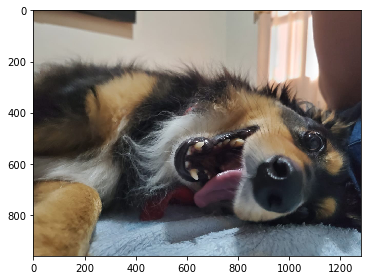

In [4]:
import os
from skimage import io


filename = os.path.join('2.data/', 'tito.jpg')
tito = io.imread(filename)

print("Dimensiones de la imagen: (filas, columnas, canales) ", tito.shape)
io.imshow(tito)
io.show()

## Downsampling

Realizamos el proceso de downsampling con un Factor de 10 en filas y columnas

Dimensiones de la imagen: (filas, columnas, canales)  (96, 128, 3)


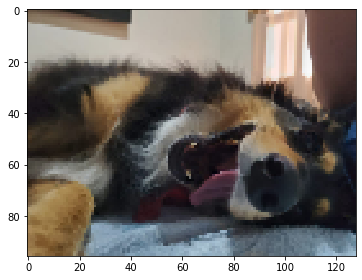

In [6]:
from skimage.measure import block_reduce
import numpy as np
from skimage import io

Factorx=10
Factory=10

I_sub = block_reduce(tito, block_size=(Factorx,Factory,1),func=np.min)

print("Dimensiones de la imagen: (filas, columnas, canales) ", I_sub.shape)
io.imshow(I_sub)
io.show()

# TALLER

Cargar una nueva imagen desde el directorio, y realizar el sumbuestreo con factores de 8 en el sentido de las filas y 4 el sentido de las columnas. En esta ocasión usar el valor mínimo como función para el submuestreo